# Bibliotecas

In [2]:
!python.exe -m pip install --upgrade pip
!pip install pandas_datareader
!pip install yfinance

     ---------------------------------------- 2.1/2.1 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


# Imports

In [6]:
import pandas_datareader as pdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# Carteira com aportes variáveis

In [68]:
# Definir a carteira
carteira = {
    'BRCR11.SA': [('2021-11-04', 1), ('2022-05-02', 1), ('2022-06-02', 3), ('2023-01-02', 4), ('2023-02-10', 1)],
    'BTAL11.SA': [('2022-05-02', 1), ('2022-06-02', 1), ('2022-08-02', 1), ('2022-08-26', 2), ('2023-03-06', 4)],
    'BTLG11.SA': [('2022-05-02', 1), ('2022-06-02', 1), ('2022-08-01', 1), ('2023-01-12', 4)],
    'CPTS11.SA': [('2022-05-02', 1), ('2022-06-02', 1), ('2022-08-01', 1), ('2022-09-02', 2), ('2023-01-02', 3)],
    'DEVA11.SA': [('2022-06-02', 1), ('2022-08-01', 1), ('2022-09-02', 2)
                  #, ('2023-05-08', 8) 
                  ],
    'HCTR11.SA': [('2023-02-27', 1)],
    'KNSC11.SA': [('2022-05-02', 2), ('2022-06-02', 1), ('2022-08-01', 1)],
    #'MALL11.SA': [('2023-05-08', 20)],
    'RBRR11.SA': [('2022-05-02', 2), ('2022-06-02', 2), ('2022-08-01', 1), ('2023-01-02', 2)],
    'RECR11.SA': [('2022-11-08', 1), ('2023-03-20', 4)],
    'SARE11.SA': [('2022-11-21', 1)],
    'SNAG11.SA': [('2022-09-02', 2), ('2022-10-10', 5)
                  #, ('2023-05-08', 3)
                  ],
    'SNFF11.SA': [('2022-08-26', 1), ('2023-03-06', 3)],
    'VISC11.SA': [('2022-05-02', 1), ('2022-06-02', 1), ('2022-08-01', 1)
                  #, ('2023-05-08', 20)
                  ],
    'XPML11.SA': [('2023-03-03', 3)
                  #, ('2023-05-08', 1)
                  ],
}


# Definir a data de início e fim da simulação
start_date = '2021-11-04'
end_date = '2023-05-08'

# Baixar os preços de fechamento históricos de cada ativo
prices = {}
for ticker in carteira.keys():
    data = yf.download(ticker, start=start_date, end=end_date)
    prices[ticker] = data['Adj Close']




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [71]:
# Calcular a valorização da carteira
valorizacao = 0
for ticker, compras in carteira.items():
    
    for compra in compras:
        data_compra, qtd = compra
        preco_compra = prices[ticker][data_compra]
        preco_atual = prices[ticker][-1]
        valorizacao += int(qtd) * (preco_atual - preco_compra)
        

print('Valorização da carteira:', valorizacao)


Valorização da carteira: -215.10405349731445


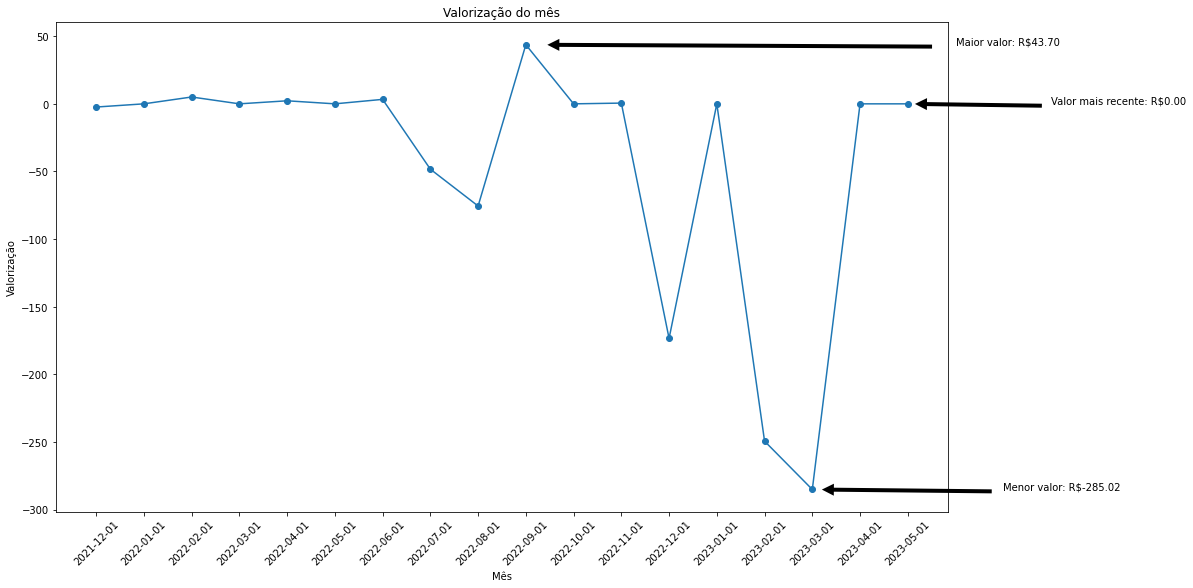

In [111]:
# Criar lista de datas
date_range = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(end_date), freq='MS')

# Calcular a valorização da carteira para cada data da lista de datas
valorizacao_mes_a_mes = []
for data in date_range:
    valorizacao = 0
    for ticker, compras in carteira.items():
        for compra in compras:
            data_compra, qtd = compra
            if pd.Timestamp(data) >= pd.Timestamp(data_compra):
                try:
                    preco_compra = prices[ticker].loc[pd.Timestamp(data_compra)]
                    preco_atual = prices[ticker].loc[pd.Timestamp(data)]
                    valorizacao += int(qtd) * (preco_atual - preco_compra)
                except KeyError:
                    pass
    valorizacao_mes_a_mes.append(valorizacao)

# Formatando as datas
date_range = date_range.strftime('%Y-%m-%d').tolist()

# Plotar gráfico
plt.figure(figsize=(16, 9))
plt.plot(date_range, valorizacao_mes_a_mes, marker='o')
plt.title('Valorização do mês')
plt.xlabel('Mês')
plt.ylabel('Valorização')
plt.xticks(rotation=45)
plt.annotate(f'Maior valor: R${max(valorizacao_mes_a_mes):,.2f}', 
             xy=(date_range[valorizacao_mes_a_mes.index(max(valorizacao_mes_a_mes))], max(valorizacao_mes_a_mes)), 
             xytext=(pd.Timestamp(date_range[valorizacao_mes_a_mes.index(max(valorizacao_mes_a_mes))]).strftime('%Y-%m-%d') + ' 30D', max(valorizacao_mes_a_mes)), 
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.0000001))
plt.annotate(f'Menor valor: R${min(valorizacao_mes_a_mes):,.2f}', 
             xy=(date_range[valorizacao_mes_a_mes.index(min(valorizacao_mes_a_mes))], min(valorizacao_mes_a_mes)), 
             xytext=(pd.Timestamp(date_range[valorizacao_mes_a_mes.index(min(valorizacao_mes_a_mes))]).strftime('%Y-%m-%d') + ' 30D', min(valorizacao_mes_a_mes)), 
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.0000001))
plt.annotate(f'Valor mais recente: R${valorizacao_mes_a_mes[-1]:,.2f}', 
             xy=(date_range[-1], valorizacao_mes_a_mes[-1]), 
             xytext=(pd.Timestamp(date_range[-1]).strftime('%Y-%m-%d') + ' 30D', valorizacao_mes_a_mes[-1]), 
             arrowprops=dict(facecolor='black', shrink=0.05, linewidth=0.0000001))


plt.show()

#TODO:  Conferir a valorização dos ativos
#       Conferir porque a valorização nos ultimos meses está zerada